In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [189]:
data = pd.read_csv('data/mtcars.csv')
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
data.dtypes

Cars     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [32]:
#analisa deskriptif
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Membuat label mpg_level berdasarkan mpg

In [33]:
mpg=np.array(data['mpg'])
level=[]

def labeling(x):
    for i in x:
        if i < 20 :
            level.append('low')
        elif i >= 20 and i<=30 :
            level.append('medium')
        else :
            level.append('hard')

labeling(mpg)
#print(mpg)
#level

In [50]:
data['mpg_level'] = level
data.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,medium
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


## <p style="color:red">Rank Mobil dari yang paling irit</p>

In [34]:
data2 = data.sort_values('mpg',ascending = False)
data2 = data2.reset_index()
data2.head()

,index,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,hard
1,17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,hard
2,27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,hard
3,18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,hard
4,25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,medium


In [39]:
#ambil 5 sampel data 
data3 = data2.iloc[:5] #bisa juga dari head
data3

,index,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,hard
1,17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,hard
2,27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,hard
3,18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,hard
4,25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,medium


## Visualization

Kita buat visualiasi sederhana untuk membandingkan Konsumsi bahan bakar (mpg) dan waktu tempuh dalam 1/4 miles atau akselerasi (qsec) dari 5 mobil teratas

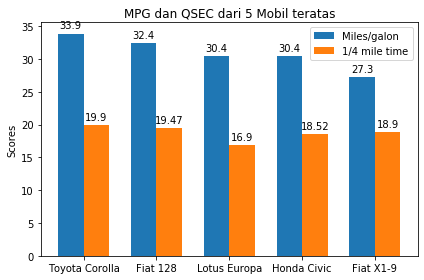

In [112]:
labels = np.array(data3['Cars'])
MPG = np.array(data3['mpg'])
QSEC = np.array(data3['qsec'])

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, MPG, width, label='Miles/galon')
rects2 = ax.bar(x + width/2, QSEC, width, label='1/4 mile time')

ax.set_ylabel('Scores')
ax.set_title('MPG dan QSEC dari 5 Mobil teratas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(ab):
    for a in ab:
        height = a.get_height()
        ax.annotate('{}'.format(height),
                    xy=(a.get_x() + a.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Jelas Toyota Corrolla pilihan terbaik dari segi performa mpg maupun qsec

## Membuat Prediksi Sederhana dengan LinearRegression <br>

<article>
Dataset berisi tentang komponen-komponen mobil yang di luar domain saya anak Matematika, namun saya telah melakukan riset kecil tentang otomotif mencari varibel <b>Indpenden</b> dan <b>Dependen</b> dari data yang tersedia yang selanjutnya akan saya lakukan analisis multivariate dan prediktif dengan <b style="color:blue">Simple Linear Regression</b>
</article> <br>


<img src="gambar/garis.png" height="400" width="400">

Mari kita lihat korelasi tiap variabel yang tersedia menggunakan <b>Heatmap</b><br>
lalu kita ambil yang berkorelasi kuat positif atau negatif (mendekati 1 atau -1)

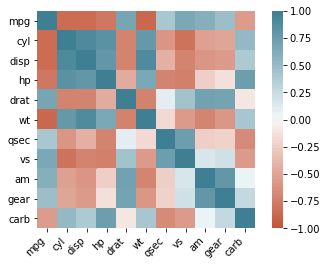

In [178]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Kita ambil contoh yaitu <b>mpg</b> vs <b>disp</b> atau keiritan vs cc yang umumnya digunakan patokan orang Indonesia dalam membeli kendaraan. <br> 
Terlihat berkorelasi negatif kuat, mari kita hitung nilai korelasinya :

In [156]:
a=np.array(data['mpg'])
b=np.array(data['disp'])
# saya menggunakan build fuction dari Numpy untuk memperpendek code
print('Nilai korelasi:',np.corrcoef(a, b)[0, 1])

Nilai korelasi: -0.8475513792624785


Benar, ini menunjukkan nilai korelasi negatif yang kuat (mendekati -1) dimana artinya jika cc semakin besar, maka semakin boros atau mpg semakin kecil

In [168]:
# mencari slope dan intercept, didapat garis
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data.disp, y=data.mpg)

print('Slope :',slope)
print('Intercept :',intercept,"\n")
print(f'Diperoleh garis linear : \ny = {slope} x + {intercept}')

Slope : -0.04121511996278613
Intercept : 29.59985475616395 

Diperoleh garis linear : 
y = -0.04121511996278613 x + 29.59985475616395


Jadi persamaan garis diatas dapat digunakan untuk melakukan prediksi apabila kita memiliki data cc mobil yang baru, <b>mpg</b> dapat diperkirakan dengan rumus tersebut, masukkan nilai <b>disp (cc)</b> ke x, maka perkiraan nilai y (<b>mpg</b>) akan didapat.

### Scatter Plot

Text(0, 0.5, 'Mpg')

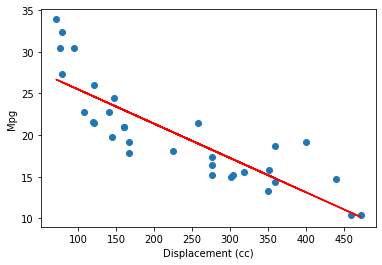

In [161]:
x=data.disp.values
lines=(-0.04121511996278613*x) + 29.59985475616395
plt.scatter(data['disp'],data['mpg'])
plt.plot(x, lines , linestyle='solid',color='red')
plt.xlabel('Displacement (cc)')
plt.ylabel('Mpg')

## Hasil Perbandingan 'mpg' Asli dan Prediksi
Berdasarkan garis regresi linear yang didapat


In [170]:
real=np.array(data['disp'])
predict=[]
for i in real:
    pr=(-0.04121511996278613*i) + 29.59985475616395
    predict.append(pr)

data4 = pd.DataFrame({
    'Real mpg':np.array(data['mpg']),
    'Predict mpg':predict
})
data4.head()

,Real mpg,Predict mpg
0,21.0,23.005436
1,21.0,23.005436
2,22.8,25.148622
3,21.4,18.966354
4,18.7,14.762412


In [188]:
print(std_err)
# Pengukuran Standar Error menghasilkan nilai yg kecil, jadi error-nya juga kecil

0.004711833309637007
